<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
def bernoulli(p):
  return 1 if np.random.uniform() <=p else 0


def exponencial(lmda=1):
  return -np.log(np.random.uniform())/lmda

c = np.sqrt((2*np.e)/np.pi)
def h_normal():
  u = np.random.uniform()
  y = exponencial(1)
  while u > (2/np.sqrt(2*np.pi))*np.e**((-y**2)/2)/ c*np.e**y:
    y = exponencial(1)
    u = np.random.uniform()
  return y


def normal_padrao():
  return h_normal() if bernoulli(1/2) else -h_normal()


def normal(mu=0, sig2=1):
  return normal_padrao()*np.sqrt(sig2) + mu


n = 1000


  ## Exercício 1
  
  Aplique a técnica da variável antitética para estimar a integral
  
  $$
  I = \int_1^2 e^x dx
  $$
  
  Compare o resultado com o método padrão (sem variável antitética).
  Repita o experimento diversas vezes, estime a variância de cada método e apresente um histograma comparando as distribuições das estimativas obtidas com e sem o uso da variável antitética.


In [54]:
simples1 = []
antiteticas1 = []

for _ in range(n):
  estimativa_MC1 = sum(np.exp(np.random.uniform()+1) for _ in range(n)) / n
  estimativa_antiteticas1 = sum((lambda u:(np.exp(u+1)/2 + np.exp(3-(u+1))/2))(np.random.uniform()) for _ in range(n))/n

  simples1.append(estimativa_MC1)
  antiteticas1.append(estimativa_antiteticas1)


Variância via Monte Carlo simples: 0.0018302429660215843
Variância via MC com Variáveis Antitéticas: 2.8927720457221655e-05


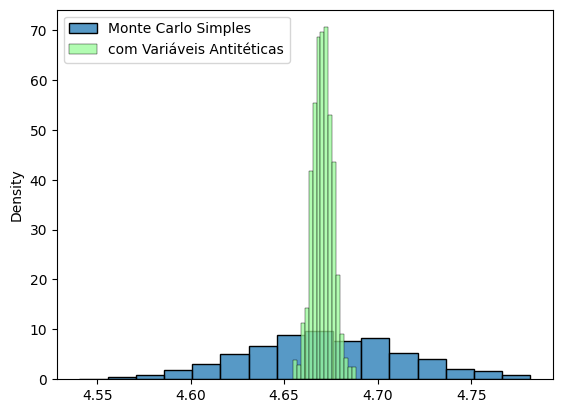

In [55]:
var_simples1 = np.var(simples1)
var_antiteticas1 = np.var(antiteticas1)

sns.histplot(simples1, bins=16, label="Monte Carlo Simples", stat='density')
sns.histplot(antiteticas1, color="palegreen",bins=16, label="com Variáveis Antitéticas", stat="density")
plt.legend()

print(f"Variância via Monte Carlo simples: {var_simples1}\n"
      f"Variância via MC com Variáveis Antitéticas: {var_antiteticas1}")



 ## Exercício 2

Aplique a técnica da variável antitética para estimar o valor esperado de $f(X)$, onde $X \sim \text{Exp}(1)$ e $f(x) = e^{-x^2} $.

Compare o resultado com o método padrão (sem variável antitética).
Repita o experimento diversas vezes, estime a variância de cada método e apresente um histograma comparando as distribuições das estimativas obtidas com e sem o uso da variável antitética."


In [44]:
simples2 = []
antiteticas2 = []

for _ in range(n):
  estimativa_MC2 = sum(np.exp(-exp()**2) for _ in range(n)) / n
  estimativa_antiteticas2 = sum((lambda u:(np.exp(-((-np.log(u))**2))/2 + np.exp(-((-np.log(1-u))**2))/2))(np.random.uniform()) for _ in range(n))/n

  simples2.append(estimativa_MC2)
  antiteticas2.append(estimativa_antiteticas2)


Variância via Monte Carlo simples: 0.00014918696987135626
Variância via MC com Variáveis Antitéticas: 1.93431170824926e-06


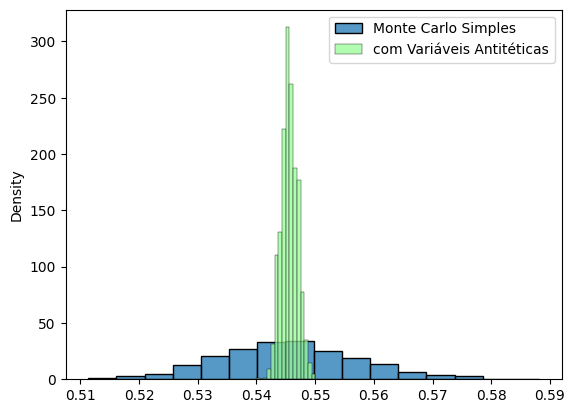

In [56]:
var_simples2 = np.var(simples2)
var_antiteticas2 = np.var(antiteticas2)

sns.histplot(simples2, bins=16, label="Monte Carlo Simples", stat='density')
sns.histplot(antiteticas2, color="palegreen",bins=16, label="com Variáveis Antitéticas", stat="density")
plt.legend()

print(f"Variância via Monte Carlo simples: {var_simples2}\n"
      f"Variância via MC com Variáveis Antitéticas: {var_antiteticas2}")


 ## Exercício 3

Aplique a técnica da variável antitética para estimar o valor esperado de $f(X)$, onde $X \sim \text{N}(1,2)$ e $f(x) = e^{-x^2+1} $.

Compare o resultado com o método padrão (sem variável antitética).
Repita o experimento diversas vezes, estime a variância de cada método e apresente um histograma comparando as distribuições das estimativas obtidas com e sem o uso da variável antitética.


In [6]:
simples3 = []
antiteticas3 = []

for _ in range(n):
  estimativa_MC3 = sum(np.exp(-(normal(1,2)**2)+1) for _ in range(n)) / n
  estimativa_antiteticas3 = sum((lambda x:(np.exp(-(x**2)+1)/2 + np.exp(-((2-x)**2)+1)/2))(normal(1,2)) for _ in range(n))/n

  simples3.append(estimativa_MC3)
  antiteticas3.append(estimativa_antiteticas3)


Variância via Monte Carlo simples: 0.0009959300418736832
Variância via MC com Variáveis Antitéticas: 0.00015995789606291821


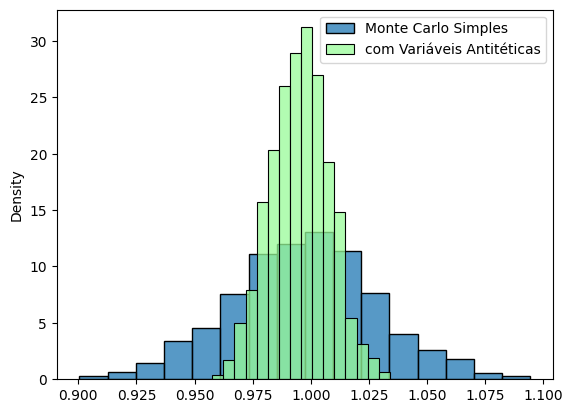

In [15]:
var_simples3 = np.var(simples3)
var_antiteticas3 = np.var(antiteticas3)

sns.histplot(simples3, bins=16, label="Monte Carlo Simples", stat='density')
sns.histplot(antiteticas3, color="palegreen",bins=16, label="com Variáveis Antitéticas", stat="density")
plt.legend()

print(f"Variância via Monte Carlo simples: {var_simples3}\n"
      f"Variância via MC com Variáveis Antitéticas: {var_antiteticas3}")